# boxplots and time series

- make time series for pyrocbs all events, pyrocb focused on sparks lake, smoke event, no smoke event
- don't need climatology anymore, it is deleted
- trying to make my code good, need to stop spending time on that though 
- box plots for all events: simple, with mean and median annotations, with lightning count annotations, seperate positive and negative
- box plots combined events: all events on one plot, do for standard, absolute value, positive and negative seperated 

# import statements and data sets

In [1]:
# import all packages that are needed 

import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import metpy  # noqa: F401
import xarray
import pandas as pd
import scipy.stats as ss 
from scipy.stats import norm

import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from IPython.display import HTML
from pymatreader import read_mat
import matplotlib.patches as mpatches

import os
import math
from shapely import geometry

from celluloid import Camera
from IPython.display import HTML
import ffmpeg
from matplotlib import animation, rc
import matplotlib.patches as mpatches
from shapely import geometry

from textwrap import wrap
import seaborn as sns

import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.gridspec as grd

from mpl_toolkits.axes_grid1 import ImageGrid
from shapely.geometry import Point, LineString, Polygon


In [2]:
# read in the data 

A = read_mat('/data/edworak/data/2021-06-28-Bortnik.mat')
df_a = pd.DataFrame(A['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june28_og = df_a.loc[:, ~df_a.columns.isin(["j",  "k", "l", "m"])]

june28 = pd.DataFrame(june28_og)
polarity = []
for i in range(len(june28_og)): 
    if june28["peak-current"][i] > 0:
           polarity.append("+")
    elif june28["peak-current"][i] < 0:
           polarity.append("-")
june28['polarity'] = polarity


B = read_mat('/data/edworak/data/2021-06-29-Bortnik.mat')
df_b = pd.DataFrame(B['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june29_og = df_b.loc[:, ~df_b.columns.isin(["j",  "k", "l", "m"])]

june29 = pd.DataFrame(june29_og)
polarity = []
for i in range(len(june29_og)): 
    if june29["peak-current"][i] > 0:
           polarity.append("+")
    elif june29["peak-current"][i] < 0:
           polarity.append("-")
june29['polarity'] = polarity


C = read_mat('/data/edworak/data/2021-06-30-Bortnik.mat')
df_c = pd.DataFrame(C['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june30_og = df_c.loc[:, ~df_c.columns.isin(["j",  "k", "l", "m"])]

june30 = pd.DataFrame(june30_og)
polarity = []
for i in range(len(june30_og)): 
    if june30["peak-current"][i] > 0:
           polarity.append("+")
    elif june30["peak-current"][i] < 0:
           polarity.append("-")
june30['polarity'] = polarity


D = read_mat('/data/edworak/data/2021-07-01-Bortnik.mat')
df_d = pd.DataFrame(D['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
july1_og = df_d.loc[:, ~df_d.columns.isin(["j",  "k", "l", "m"])]

july1 = pd.DataFrame(july1_og)
polarity = []
for i in range(len(july1_og)): 
    if july1["peak-current"][i] > 0:
           polarity.append("+")
    elif july1["peak-current"][i] < 0:
           polarity.append("-")
july1['polarity'] = polarity


In [3]:
E = read_mat('2021-06-15.mat')
df_e = pd.DataFrame(E['Events'], columns = ["year", "month", "day", "hour", "minute", "second", "lat", "lon", "peak-current", "j",  "k", "l", "m"])
june15_og = df_e.loc[:, ~df_e.columns.isin(["j",  "k", "l", "m"])]

june15 = pd.DataFrame(june15_og)
polarity = []
for i in range(len(june15_og)): 
    if june15["peak-current"][i] > 0:
           polarity.append("+")
    elif june15["peak-current"][i] < 0:
           polarity.append("-")
june15['polarity'] = polarity


# functions 

In [4]:
# june 30 hour 21 to july 1 hour 5
june30_21to24 = june30[(june30["hour"] >= 21) & (june30["hour"] <= 24)]
july1_0to5 = july1[(july1["hour"] >= 0) & (july1["hour"] <= 5.0)]
frames1 = [june30_21to24, july1_0to5]
june30_july1_concat = pd.concat(frames1)

frames2 = [june29, june30, july1]
whole_concat = pd.concat(frames2)

frames3 = [june28, june29, june30, july1]
alldays_concat = pd.concat(frames3)

## all days for loop
- pyrocb: -121.5 W : -119 W, 51 N : 53 N, June 30 23 UTC to July 1 3 UTC
- smoke: -120 W : -114 W, 58 N : 60.5 N, June 29 8 to 12 UTC
- control: varies

- can't just append because it will append all previous iterations too

In [5]:
days = [28, 29, 30, 1]
hours = range(0, 24, 1)

mins = range(0, 60, 10)

# all_strikes_pyrocb = []
empty_hours_pyrocb = []
empty_strikes_pyrocb = []
all_strikes_pyrocb_flat = []
num_strikes_pyrocb = np.zeros((len(days), len(hours), len(mins)))
mean_current_pyrocb = np.zeros((len(days), len(hours), len(mins)))
mean_pos_current_pyrocb = np.zeros((len(days), len(hours), len(mins)))
mean_neg_current_pyrocb = np.zeros((len(days), len(hours), len(mins)))
percent_pos_current_pyrocb = np.zeros((len(days), len(hours), len(mins)))
num_pos_current_pyrocb =  np.zeros((len(days), len(hours), len(mins)))
num_neg_current_pyrocb =  np.zeros((len(days), len(hours), len(mins)))

# all_strikes_smoke = []
all_strikes_smoke_flat = []
empty_hours_smoke = []
empty_strikes_smoke = []
num_strikes_smoke = np.zeros((len(days), len(hours), len(mins)))
mean_current_smoke = np.zeros((len(days), len(hours), len(mins)))
mean_pos_current_smoke = np.zeros((len(days), len(hours), len(mins)))
mean_neg_current_smoke = np.zeros((len(days), len(hours), len(mins)))
percent_pos_current_smoke = np.zeros((len(days), len(hours),len(mins)))
num_pos_current_smoke = np.zeros((len(days), len(hours), len(mins)))
num_neg_current_smoke = np.zeros((len(days), len(hours), len(mins)))

all_strikes_mckay_flat = []
empty_hours_mckay = []
empty_strikes_mckay = []
num_strikes_mckay = np.zeros((len(days), len(hours), len(mins)))
mean_current_mckay = np.zeros((len(days), len(hours), len(mins)))
mean_pos_current_mckay = np.zeros((len(days), len(hours), len(mins)))
mean_neg_current_mckay = np.zeros((len(days), len(hours), len(mins)))
percent_pos_current_mckay = np.zeros((len(days), len(hours),len(mins)))
num_pos_current_mckay = np.zeros((len(days), len(hours), len(mins)))
num_neg_current_mckay = np.zeros((len(days), len(hours), len(mins)))

def alldays_function(df):
    for d in range(len(days)): 
        for i in range(len(hours)): 
            for j in range(len(mins)): 
                # time = df[(df["hour"] == hours[i]) & (df["minute"] >= mins[j]) & (df["minute"] <= mins[j] + 9)]

# pyrocb        
                if (days[d] == 30 and hours[i] >= 22) or (days[d] == 1 and hours[i] <= 3): 
    
                    #strikes_pyrocb = time.loc[(time["hour"] == hours[i]) & (time["minute"] >= mins[j]) & (time["minute"] <= mins[j] + 9) & (time["day"] == days[d]) & (time["lon"] >= -121.5) & (time["lon"] <= -119) & (time["lat"] >= 51) & (time["lat"] <= 53)]
                    
                    strikes_pyrocb = df.loc[(df.day == days[d]) & (df.hour == hours[i]) & (df.minute >= mins[j]) & (df.minute <= mins[j] + 9) & (df.lon >= -121.5) & (df.lon <= -120) & (df.lat >= 51) & (df.lat <= 53)]

                    if len(strikes_pyrocb) >= 1: 
                        # [all_strikes_pyrocb.append(np.array(strikes_pyrocb["peak-current"])) for x in strikes_pyrocb["peak-current"] if x not in all_strikes_pyrocb]
                        #[all_strikes_pyrocb.append(np.array(strikes_pyrocb["peak-current"]))]

                        # this will give us flat arrays for all strikes, hours array will show time stamps                        
                        all_strikes_pyrocb = np.append(empty_strikes_pyrocb, strikes_pyrocb["peak-current"])
                        hours_pyrocb = np.append(empty_hours_pyrocb, strikes_pyrocb["hour"], axis = 0)
                        num_strikes_pyrocb[d,i,j] = len(strikes_pyrocb)
                        mean_current_pyrocb[d,i,j] = np.mean(abs(strikes_pyrocb["peak-current"]))

                        pos_current_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["peak-current"] > 0)]
                        num_pos_current_pyrocb[d,i,j]= len(pos_current_pyrocb)
                        mean_pos_current_pyrocb[d,i,j] = pos_current_pyrocb["peak-current"].mean()

                        neg_current_pyrocb = strikes_pyrocb.loc[(strikes_pyrocb["peak-current"] < 0)]
                        num_neg_current_pyrocb[d,i,j] = len(neg_current_pyrocb)

                        mean_neg_current_pyrocb[d,i,j] = neg_current_pyrocb["peak-current"].mean()

                        if len(strikes_pyrocb)> 2: 
                            percent_pos_current_pyrocb[d,i,j] = (len(pos_current_pyrocb["peak-current"]) / len(strikes_pyrocb)) * 100

# smoke region  
                # if (days[d] == 29 and hours[i] >= 8 <= hours[i] <=13): 
                if (days[d] == 29): 


                    #strikes_smoke = (time.loc[(time["hour"] == hours[i]) & (time["minute"] >= mins[j]) & (time["minute"] <= mins[j] + 9) & (time["lon"] >= -120) & (time["lon"] <= -114) & (time["lat"] >= 58) & (time["lat"] <= 60.5)])
                    strikes_smoke = (df.loc[(df.day == days[d]) & (df.hour == hours[i]) & (df.minute >= mins[j]) & (df.minute <= mins[j] + 9) & (df.lon >= -120) & (df.lon <= -114) & (df.lat >= 58) & (df.lat  <= 60.5)])

                    if len(strikes_smoke) >= 1: 
                        # [all_strikes_smoke.append(np.array(strikes_smoke["peak-current"])) for x in strikes_smoke["peak-current"] if x not in all_strikes_smoke]
                        # [all_strikes_smoke.append(np.array(strikes_smoke["peak-current"]))]

                        # this will give us flat arrays for all strikes, hours array will show time stamps                        
                        all_strikes_smoke = np.append(empty_strikes_smoke, strikes_smoke["peak-current"])
                        hours_smoke = np.append(empty_hours_smoke, strikes_smoke["hour"], axis = 0)
                        
#                         for value in strikes_smoke["peak-current"]: 
#                             num_strikes_smoke[d,i,j] += 1
                        
                        num_strikes_smoke[d,i,j] = len(strikes_smoke)
                        
                        mean_current_smoke[d,i,j] = (abs(strikes_smoke["peak-current"])).mean()
                        pos_current_smoke = strikes_smoke.loc[(strikes_smoke["peak-current"] > 0)]
                        num_pos_current_smoke[d,i,j] = len(pos_current_smoke)
                        mean_pos_current_smoke[d,i,j] = pos_current_smoke["peak-current"].mean()

                        neg_current_smoke = strikes_smoke.loc[(strikes_smoke["peak-current"] < 0)]
                        num_neg_current_smoke[d,i,j] = len(neg_current_smoke)
                        mean_neg_current_smoke[d,i,j] = neg_current_smoke["peak-current"].mean()

                        if len(strikes_smoke) > 2: 
                            percent_pos_current_smoke[d,i,j] = (len(pos_current_smoke["peak-current"]) / len(strikes_smoke)) * 100

                if (days[d] == 29):         
                    strikes_mckay = (df.loc[(df.day == days[d]) & (df.hour == hours[i]) & (df.minute >= mins[j]) & (df.minute <= mins[j] + 9) & (df.lon >= -122.5) & (df.lon <= -122) & (df.lat >= 51) & (df.lat  <= 53)])

                    if len(strikes_mckay) >= 1: 
                                     
                        all_strikes_mckay = np.append(empty_strikes_mckay, strikes_mckay["peak-current"])
                        hours_mckay = np.append(empty_hours_mckay, strikes_mckay["hour"], axis = 0)
                        
                        num_strikes_mckay[d,i,j] = len(strikes_mckay)
                        
                        mean_current_mckay[d,i,j] = (abs(strikes_mckay["peak-current"])).mean()
                        pos_current_mckay = strikes_mckay.loc[(strikes_mckay["peak-current"] > 0)]
                        num_pos_current_mckay[d,i,j] = len(pos_current_mckay)
                        mean_pos_current_mckay[d,i,j] = pos_current_mckay["peak-current"].mean()

                        neg_current_mckay = strikes_mckay.loc[(strikes_mckay["peak-current"] < 0)]
                        num_neg_current_mckay[d,i,j] = len(neg_current_mckay)
                        mean_neg_current_mckay[d,i,j] = neg_current_mckay["peak-current"].mean()

                        if len(strikes_mckay) > 2: 
                            percent_pos_current_mckay[d,i,j] = (len(pos_current_mckay["peak-current"]) / len(strikes_mckay)) * 100

    return(num_strikes_pyrocb, percent_pos_current_pyrocb, num_pos_current_pyrocb, num_neg_current_pyrocb, 
            mean_current_pyrocb, mean_pos_current_pyrocb, mean_neg_current_pyrocb, 
            num_strikes_smoke, num_pos_current_smoke, num_neg_current_smoke, percent_pos_current_smoke,
            mean_current_smoke, mean_pos_current_smoke, mean_neg_current_smoke, 
            num_strikes_mckay, percent_pos_current_mckay, num_pos_current_mckay, num_neg_current_mckay, 
            mean_current_mckay, mean_pos_current_mckay, mean_neg_current_mckay, 
            all_strikes_pyrocb, hours_pyrocb, all_strikes_smoke, hours_smoke)



In [6]:
d = {}

names = ["num_strikes_pyrocb", "percent_pos_current_pyrocb", "num_pos_current_pyrocb", "num_neg_current_pyrocb", 
           "mean_current_pyrocb", "mean_pos_current_pyrocb", "mean_neg_current_pyrocb",
          "num_strikes_smoke", "num_pos_current_smoke", "num_neg_current_smoke", "percent_pos_current_smoke",
           "mean_current_smoke", "mean_pos_current_smoke", "mean_neg_current_smoke",  
            "num_strikes_mckay", "percent_pos_current_mckay", "num_pos_current_mckay", "num_neg_current_mckay", 
            "mean_current_mckay", "mean_pos_current_mckay", "mean_neg_current_mckay"]

for i in range(0, len(names)):
    a = alldays_function(alldays_concat)[i]
    b = [item for sublist in a for item in sublist]
    c = [item for sublist in b for item in sublist]
    d[names[i]] = c


In [7]:
np.mean(d["percent_pos_current_pyrocb"][425:446])

60.162572646592665

In [8]:
d["all_strikes_pyrocb"] = alldays_function(alldays_concat)[14]
d["all_strikes_smoke"] = alldays_function(alldays_concat)[15]
d["hours_pyrocb"] = alldays_function(alldays_concat)[16]
d["hours_smoke"] = alldays_function(alldays_concat)[17]

# all strikes pyrocb is broken, only appends last iteration  

In [9]:
#d["hours_pyrocb"]

### nested array pyrocb 

In [10]:
hours = [22.0, 23.0, 0.0, 1.0, 2.0]
mins = range(0, 60, 10)
pyrocb_array = []
pyrocb_pos_array = []
pyrocb_neg_array = []
pyrocb_percent_pos = []
pyrocb_percent_neg = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        time = june30_july1_concat[(june30_july1_concat["hour"] == hours[i]) & (june30_july1_concat["minute"] >= mins[j]) & (june30_july1_concat["minute"] <= mins[j] + 9)]
        data_pyrocb = (time.loc[(time.lon >= -121.5) & (time.lon <= -119) & (time.lat >= 51) & (time.lat <= 53)])
        if len(data_pyrocb) > 1: 
            pyrocb_array.append(np.array(data_pyrocb["peak-current"]))
            pyrocb_pos_array.append(np.array(data_pyrocb[(data_pyrocb["peak-current"] > 0)]["peak-current"]))
            pyrocb_neg_array.append(np.array(data_pyrocb[(data_pyrocb["peak-current"] < 0)]["peak-current"]))
            pyrocb_percent_pos.append(np.array((len(data_pyrocb[(data_pyrocb["peak-current"] > 0)]["peak-current"]) / len(data_pyrocb["peak-current"])) * 100))
            pyrocb_percent_neg.append(np.array((len(data_pyrocb[(data_pyrocb["peak-current"] < 0)]["peak-current"]) / len(data_pyrocb["peak-current"]))* 100))
    
pyrocb_mag_array = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        time = june30_july1_concat[(june30_july1_concat["hour"] == hours[i]) & (june30_july1_concat["minute"] >= mins[j]) & (june30_july1_concat["minute"] <= mins[j] + 9)]
        data_pyrocb = (time.loc[(time.lon >= -121.5 ) & (time.lon <= -120) & (time.lat >= 51) & (time.lat <= 53)])
        if len(data_pyrocb) > 1: 
            pyrocb_mag_array.append(np.array(abs(data_pyrocb["peak-current"])))

pyrocb_array_flat = [item for sublist in pyrocb_array for item in sublist]
pyrocb_mag_array_flat = [item for sublist in pyrocb_mag_array for item in sublist]
pyrocb_pos_array_flat = [item for sublist in pyrocb_pos_array for item in sublist]
pyrocb_neg_array_flat = [item for sublist in pyrocb_neg_array for item in sublist]


In [11]:
pyrocb_array

[array([  8.,   3.,   7.,   3.,  16.,   3.,   8.,  -5.,   4.,   2.,   3.,
          2.,   3., -12.,   3.,  -3.]),
 array([  7.,   2.,  13.,  11.,   3.,   5.,  11.,   9.,  -6.,   3.,  -3.,
          2.,   3.,   2.,   3., -41., -19.,   3.,  -9.,   5.,   2.,   3.,
         -4.,   6.,  -2.,  18.,   3.,  -2.,  -2.,   8.,   8.,  -3.,   7.,
          3.,  -3.,   8.,  -3.,   3.,  11.,   3.,   9.,   2.,  -6.,  -3.,
          2.,   4.,   5.,  -3., -18., -27.,  -3.,  -4.,  -4.,  -3.,   3.,
          4.,  23.,  14.,   5.,   2.,   6., -11.,   8.,   7.,  -5.,  -2.,
          3.,  -2.,   6.,   3., -14.,  -4., -12.,   6.,   3.,  29.,  -5.,
          4.,   6.,   8.,   4.,   6.,  -3.,   3.,  -8.,   3., -12.,   4.,
          4.,   4.,   6.,  -9.,   2.,  -3.,   3.,  -5.,  -2.,   4.,   2.,
         -4.,  -3.,   2.,  12.,   5.,  -3.,  24.,   4.,   3.,   8.,  -9.,
         -4.,  -5.,  -2.,   3.,  -7.,  12.,   2.,   5.,   4.,  -4.,  -3.,
          4.,  -4.,   7.,   2.,  10.,   3.,   4., -19.,   5.,   3.,   8.

### nested array smoke 

In [12]:
hours = range(8, 13, 1)
mins = range(0, 60, 10)

smoke_array = []
smoke_pos_array = []
smoke_neg_array = []
smoke_percent_pos = []
smoke_percent_neg = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        points = june29[(june29["hour"] == 8 + i) & (june29["lon"] >= -120) & (june29["lon"] <= -114) & (june29["lat"] >= 58) & (june29["lat"] <= 60.5) & (june29["minute"] >= mins[j]) & (june29["minute"] <= mins[j] + 9)]
        smoke_array.append(np.array(points["peak-current"]))
        smoke_pos_array.append(np.array(points[(points["peak-current"] > 0)]["peak-current"]))
        smoke_neg_array.append(np.array(points[(points["peak-current"] < 0)]["peak-current"]))
        smoke_percent_pos.append(np.array((len(points[(points["peak-current"] > 0)]["peak-current"]) / len(points["peak-current"])) * 100))
        smoke_percent_neg.append(np.array((len(points[(points["peak-current"] < 0)]["peak-current"]) / len(points["peak-current"])) * 100))
    
smoke_array_flat = [item for sublist in smoke_array for item in sublist]
smoke_pos_array_flat = [item for sublist in smoke_pos_array for item in sublist] 
smoke_neg_array_flat = [item for sublist in smoke_neg_array for item in sublist] 


## june 15 matching BT for loop

In [13]:
days = [15]

hours = range(18, 23, 1)
mins = range(0, 60, 10)

all_strikes_control = []
empty_strikes = [[], [], [], [], [], []]
num_strikes_control = np.zeros((len(hours), len(mins)))
percent_pos_current_control = np.zeros((len(hours),len(mins)))
num_pos_current_control = np.zeros((len(hours), len(mins)))
num_neg_current_control = np.zeros((len(hours), len(mins)))
mean_current_control = np.zeros((len(hours), len(mins)))
mean_pos_current_control = np.zeros((len(hours), len(mins)))
mean_neg_current_control = np.zeros((len(hours), len(mins)))
all_strikes_control = np.zeros((len(hours), len(mins)))


# np.reshape(a, (2, 3))

def june15_function(df):
    for k in range(len(days)):
        for i in range(len(hours)): 
            for j in range(len(mins)): 

                time = df[(df["day"] == days[k]) & (df["hour"] == hours[i]) & (df["minute"] >= mins[j]) & (df["minute"] <= mins[j] + 9)]

                if hours[i] == 18: 
                    strikes_control = (time.loc[(time["lon"] >= -117)& (time["lon"] <= -112) & (time["lat"] >= 53) & (time["lat"] <= 56)])
                elif hours[i] == 19: 
                    strikes_control = (time.loc[(time["lon"] >= -116.5)& (time["lon"] <= -111) & (time["lat"] >= 54) & (time["lat"] <= 57)])
                elif hours[i] == 20: 
                    strikes_control = (time.loc[(time["lon"] >= -116)& (time["lon"] <= -110) & (time["lat"] >= 55) & (time["lat"] <= 58) ])
                elif hours[i] == 21: 
                    strikes_control = (time.loc[(time["lon"] >= -115.5)& (time["lon"] <= -110) & (time["lat"] >= 56) & (time["lat"] <= 59) ])
                elif hours[i] == 22: 
                    strikes_control = (time.loc[(time["lon"] >= -115)& (time["lon"] <= -110) & (time["lat"] >= 57) & (time["lat"] <= 60) ])
                    
                if len(strikes_control) >= 1:    
                    #print(len(strikes_control))
                    all_strikes_control = np.append(empty_strikes, strikes_control["peak-current"])
                    #np.reshape(all_strikes_control, (len(strikes_control[i]), i))
                    #all_strikes_control.append(np.array(strikes_control["peak-current"], dtype = object))
                    num_strikes_control[i,j] = len(strikes_control)
                    mean_current_control[i,j] = np.mean(abs(strikes_control["peak-current"]))
                    pos_current_control = strikes_control.loc[(strikes_control["peak-current"] > 1)]
                    num_pos_current_control[i,j] = len(pos_current_control)
                    mean_pos_current_control[i,j] = np.mean(pos_current_control["peak-current"])
                    neg_current_control = strikes_control.loc[(strikes_control["peak-current"] < 0)]
                    num_neg_current_control[i,j] = len(neg_current_control)
                    mean_neg_current_control[i,j] = np.mean(neg_current_control["peak-current"])

                    if len(strikes_control) > 1: 
                        percent_pos_current_control[i,j] = (num_pos_current_control[i,j] / (num_pos_current_control[i,j] + num_neg_current_control[i,j])) * 100

    return(num_strikes_control, percent_pos_current_control, num_pos_current_control, num_neg_current_control, 
           mean_current_control, mean_pos_current_control, mean_neg_current_control, all_strikes_control)


In [14]:
june15_function(june15)[7]

array([ 10.,  47., -48., ..., -10., -16., -24.])

In [15]:
d15 = {}

names2 = ["num_strikes_control", "percent_pos_current_control", "num_pos_current_control", "num_neg_current_control", 
        "mean_current_control", "mean_pos_current_control", "mean_neg_current_control"]

for i in range(0, 6):
    a = june15_function(june15)[i]
    b = [item for sublist in a for item in sublist]
    d15[names2[i]] = b

In [16]:
d15["all_strikes_control"] = june15_function(june15)[7]
#d15["all_strikes_control"]

### nested array no smoke

In [17]:
hours = range(18, 23, 1)
mins = range(0, 60, 10)

nosmoke_array = []
nosmoke_pos_array = []
nosmoke_neg_array = []
nosmoke_percent_pos = []
nosmoke_percent_neg = []

for i in range(len(hours)): 
    for j in range(len(mins)): 
        if hours[i] == 18: 
            data_nosmoke = june15[(june15["hour"] == 18) & (june15["lon"] >= -117)& (june15["lon"] <= -112) & (june15["lat"] >= 53) & (june15["lat"] <= 56) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
        if hours[i] == 19: 
            data_nosmoke = june15[(june15["hour"] == 19) & (june15["lon"] >= -116.5)& (june15["lon"] <= -111) & (june15["lat"] >= 54) & (june15["lat"] <= 57) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
        if hours[i] == 20: 
            data_nosmoke = june15[(june15["hour"] == 20) & (june15["lon"] >= -116)& (june15["lon"] <= -110) & (june15["lat"] >= 55) & (june15["lat"] <= 58) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
        if hours[i] == 21: 
            data_nosmoke = june15[(june15["hour"] == 21) & (june15["lon"] >= -115.5)& (june15["lon"] <= -110) & (june15["lat"] >= 56) & (june15["lat"] <= 59) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
        if hours[i] == 22: 
            data_nosmoke = june15[(june15["hour"] == 22) & (june15["lon"] >= -115)& (june15["lon"] <= -110) & (june15["lat"] >= 57) & (june15["lat"] <= 60) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
        
        
        if len(data_nosmoke) >= 1:    
            nosmoke_array.append(np.array(data_nosmoke["peak-current"]))    
            nosmoke_pos_array.append(np.array(data_nosmoke[(data_nosmoke["peak-current"] > 0)]["peak-current"]))
            nosmoke_neg_array.append(np.array(data_nosmoke[(data_nosmoke["peak-current"] < 0)]["peak-current"]))
            nosmoke_percent_pos.append(np.array((len(data_nosmoke[(data_nosmoke["peak-current"] > 0)]["peak-current"]) / len(data_nosmoke["peak-current"])) * 100))
            nosmoke_percent_neg.append(np.array((len(data_nosmoke[(data_nosmoke["peak-current"] < 0)]["peak-current"]) / len(data_nosmoke["peak-current"])) * 100))
    

nosmoke_array_flat = [item for sublist in nosmoke_array for item in sublist]
nosmoke_pos_array_flat = [item for sublist in nosmoke_pos_array for item in sublist]
nosmoke_neg_array_flat = [item for sublist in nosmoke_neg_array for item in sublist]



## mean current comparison 

In [18]:
if d["mean_current_pyrocb"] != 0: 
    mean_mag_pyrocb = np.mean(d["mean_current_pyrocb"])
    mean_pyrocb = np.mean(pyrocb_array_flat)
print(mean_mag_pyrocb)
print(mean_pyrocb)

if d["mean_current_smoke"] != 0: 
    mean_mag_smoke = np.mean(d["mean_current_smoke"])
    mean_smoke = np.mean(smoke_array_flat)
print(mean_mag_smoke)
print(mean_smoke)

if d15["mean_current_control"] !=0: 
    mean_mag_control = np.mean(d15["mean_current_control"])
    mean_control = np.mean(nosmoke_array_flat)
print(mean_mag_control)
print(mean_control)

0.3985169626667024
-0.17024448419797256
1.040754164925825
-1.3502853886610555
24.952316456524372
-11.847276479693374


## histogram 

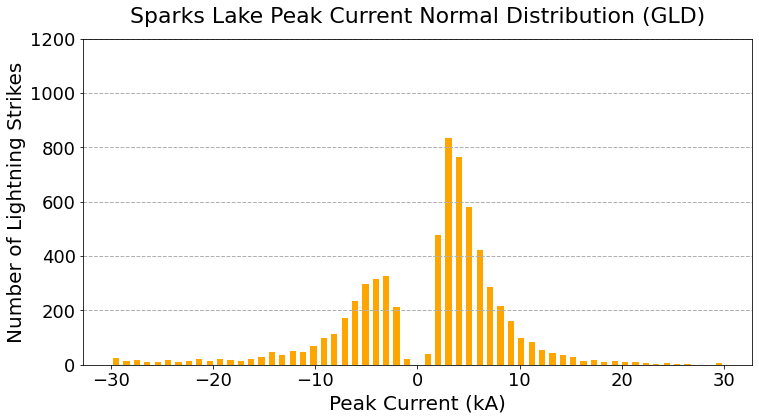

In [22]:
fig = plt.figure(figsize=(12,6))

weights = np.ones_like(pyrocb_array_flat) / len(pyrocb_array_flat)

colors = ["orange"]

bins = np.linspace(-30, 30, 60)
#bins=[-100, -50, -25, 0, 25, 50, 100, 200]
#  weights = [weights],
plt.hist([pyrocb_array_flat], bins, alpha = 1, histtype='bar', color=colors, rwidth=0.6) 

plt.grid(axis='y', linestyle='--', linewidth=1)
#plt.tight_layout()
plt.title("Sparks Lake Peak Current Normal Distribution (GLD)", fontsize = 22, y = 1.03)
plt.xlabel("Peak Current (kA)", fontsize = 20)
plt.ylabel("Number of Lightning Strikes", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.ylim((0,1200))
plt.savefig("pyrocb_histogram", dpi = 200)
plt.show()




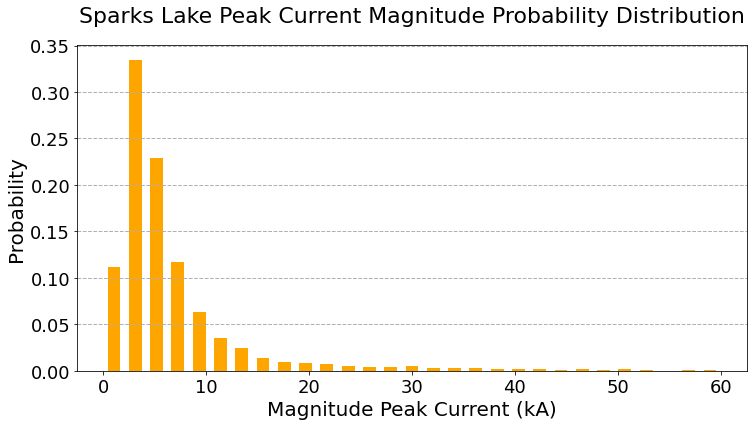

In [40]:
fig = plt.figure(figsize=(12,6))
#fig, ax = plt.subplots(figsize=(10,8))


weights = np.ones_like(pyrocb_mag_array_flat) / len(pyrocb_mag_array_flat)

colors = ["orange"]

bins = np.linspace(0, 60, 30)

plt.hist([pyrocb_mag_array_flat], bins, alpha = 1, histtype='bar', weights = [weights], color=colors, rwidth=0.6) 

#plt.tight_layout()
plt.title("Sparks Lake Peak Current Magnitude Probability Distribution", fontsize = 22, y = 1.05)
plt.xlabel("Magnitude Peak Current (kA)", fontsize = 20)
plt.ylabel("Probability", fontsize = 20)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.grid(axis='y', linestyle='--', linewidth=1)
plt.savefig("pyrocb_magnitude_histogram", dpi = 200)
plt.show()




# maps

## pyrocb map

In [21]:
def pyrocb_subregion_box(ax, subregion):
    geom = geometry.box(minx=-121.5,maxx=-120,miny=51,maxy=53)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax
len(alldays_concat.loc[(alldays_concat.lon > -121.5) & (alldays_concat.lon < -120) & (alldays_concat.lat > 51) & (alldays_concat.lat < 53)])

6970

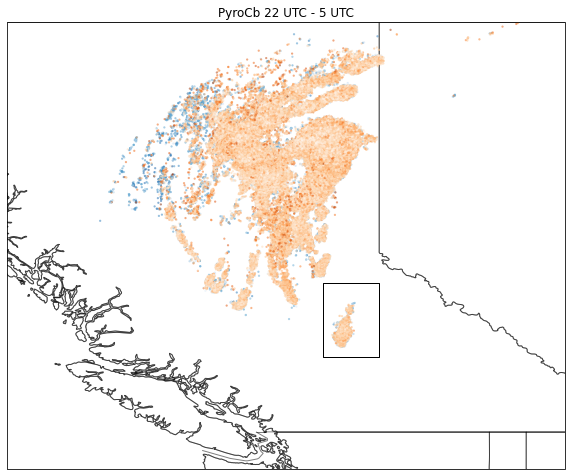

In [25]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
plt.xlim([-130, -115])
plt.ylim([48, 60])


points_pos = (june30_july1_concat.loc[(june30_july1_concat.lon > -130) & (june30_july1_concat.lon < -100) & (june30_july1_concat.lat > 45) & (june30_july1_concat.lat < 65) & (june30_july1_concat["peak-current"] > 0)])# & (june30_july1_concat["hour"] <=1)])
points_neg = (june30_july1_concat.loc[(june30_july1_concat.lon > -130) & (june30_july1_concat.lon < -100) & (june30_july1_concat.lat > 45) & (june30_july1_concat.lat < 65) & (june30_july1_concat["peak-current"] < 0) ])# & (june30_july1_concat["hour"] <=1)])
pyrocb_subregion_box(ax, points_pos)

#negative polarity 
plt.scatter(x = points_neg["lon"], y = points_neg["lat"], c = np.log(abs(points_neg["peak-current"])), cmap="Blues", s = 5, edgecolors="none", marker = 'o', alpha=0.5)
#positive polarity
plt.scatter(x = points_pos["lon"], y = points_pos["lat"], c = np.log(points_pos["peak-current"]), cmap="Oranges", s = 5, edgecolors="none", marker = 'o', alpha=0.5)

plt.title("PyroCb 22 UTC - 5 UTC")
plt.savefig("pos_neg_map", dpi = 200)

plt.show()

/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


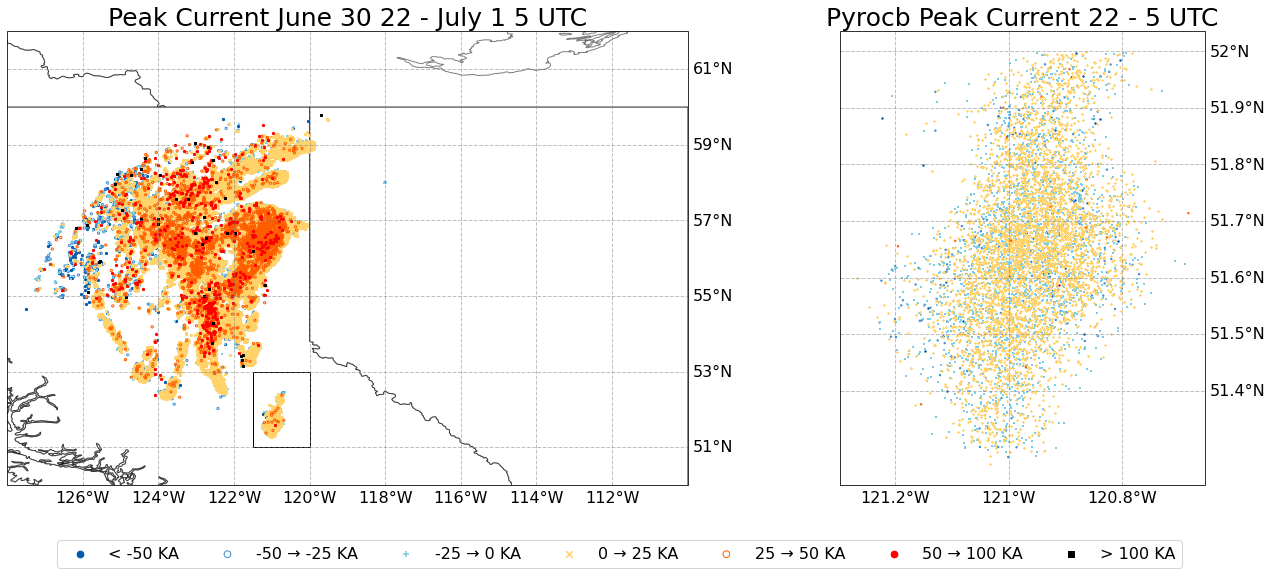

In [57]:
fig = plt.subplots(figsize=(18,18))

#entire region
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

points = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 60)])

whole_darkblue = (points.loc[(points["peak-current"] <= -50)])
whole_medblue = (points.loc[(points["peak-current"] > -50 ) & (points["peak-current"] <=-25 )])
whole_lightblue = (points.loc[(points["peak-current"] > -25 ) & (points["peak-current"] <=0 )])
whole_lightorange = (points.loc[(points["peak-current"] > 0 ) & (points["peak-current"] <=25 ) ])
whole_darkorange = (points.loc[(points["peak-current"] > 25 ) & (points["peak-current"] <=50 )  ])
whole_red = (points.loc[(points["peak-current"] > 50 ) & (points["peak-current"] <=100 )])
whole_black = (points.loc[(points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

plt.legend(loc='lower center', 
           bbox_to_anchor=(0.9, -0.2),
          ncol=7, fancybox=True, shadow=False, fontsize = 16, markerscale=3.,)

pyrocb_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59,  61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 30 22 - July 1 5 UTC", fontsize = 25)

#pyrocb region  
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())
# ax.set_extent([-121.5,-120.5,51,52.5])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

points_pyrocb = (june30_july1_concat.loc[(june30_july1_concat.lon > -122) & (june30_july1_concat.lon < -119) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 52)])

pyrocb_darkblue = (points_pyrocb.loc[ (points_pyrocb["peak-current"] <= -50) ])
pyrocb_medblue = (points_pyrocb.loc[ (points_pyrocb["peak-current"] > -50 ) & (points_pyrocb["peak-current"] <=-25 ) ])
pyrocb_lightblue = (points_pyrocb.loc[(points_pyrocb["peak-current"] > -25 ) & (points_pyrocb["peak-current"] <=0 ) ])
pyrocb_lightorange = (points_pyrocb.loc[(points_pyrocb["peak-current"] > 0 ) & (points_pyrocb["peak-current"] <=25 )])
pyrocb_darkorange = (points_pyrocb.loc[(points_pyrocb["peak-current"] > 25 ) & (points_pyrocb["peak-current"] <=50 ) ])
pyrocb_red = (points_pyrocb.loc[(points_pyrocb["peak-current"] > 50 ) & (points_pyrocb["peak-current"] <=100 ) ])
pyrocb_black = (points_pyrocb.loc[(points_pyrocb["peak-current"] > 100 ) ])


plt.scatter(x = pyrocb_darkblue["lon"], y = pyrocb_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 2, alpha=1, label = '< -50 KA')
plt.scatter(x = pyrocb_medblue["lon"], y = pyrocb_medblue["lat"], facecolors='none', edgecolors='#418DD0', marker = "o", s = 2, alpha=1, label='-50 → -25 KA')
plt.scatter(x = pyrocb_lightblue["lon"], y = pyrocb_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 2, alpha=1, label='-25 → 0 KA')
plt.scatter(x = pyrocb_lightorange["lon"], y = pyrocb_lightorange["lat"], c = "#FFD26A", marker = "x", s = 2, alpha=1, label = "0 → 25 KA")
plt.scatter(x = pyrocb_darkorange["lon"], y = pyrocb_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 2, alpha=1, label ="25 → 50 KA" )
plt.scatter(x = pyrocb_red["lon"], y = pyrocb_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 2, alpha=1, label = "50 → 100 KA")
plt.scatter(x = pyrocb_black["lon"], y = pyrocb_black["lat"], c = "black", marker = "s", s = 2, alpha=1, label = "> 100 KA")


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-121.2,  -121.0,  -120.8])
gl.ylocator = mticker.FixedLocator([51.4, 51.5, 51.6, 51.7, 51.8, 51.9, 52.0])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.subplots_adjust(left=0, right=1.1, top=0.35, bottom=0.0, wspace = -0.1)

tight_layout=True
plt.title("Pyrocb Peak Current 22 - 5 UTC", fontsize = 25)
plt.savefig("lightning_strength_and_polarity_00utc_subplots", bbox_inches = "tight", dpi = 200)
plt.show()


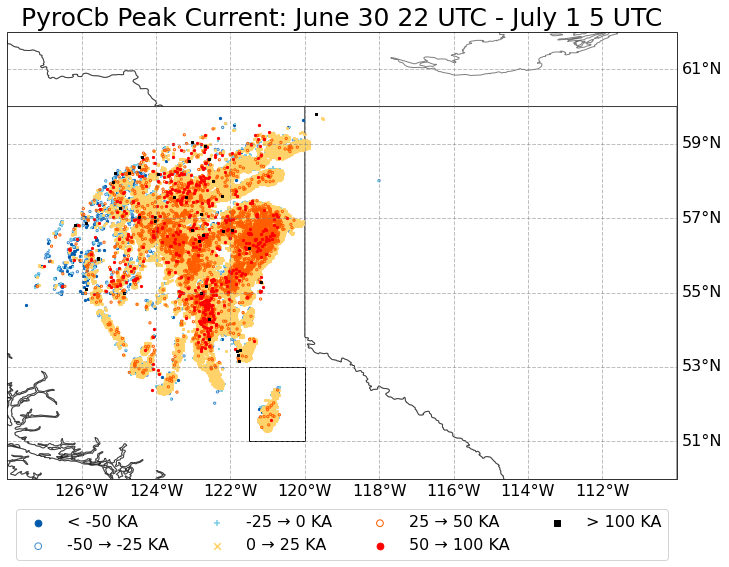

In [72]:
fig = plt.subplots(figsize=(12,12))

#entire region
ax = plt.subplot(1,1,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])
#ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

points = (june30_july1_concat.loc[(june30_july1_concat.lon > -128) & (june30_july1_concat.lon < -118) & (june30_july1_concat.lat > 48) & (june30_july1_concat.lat < 60)])

whole_darkblue = (points.loc[(points["peak-current"] <= -50)])
whole_medblue = (points.loc[(points["peak-current"] > -50 ) & (points["peak-current"] <=-25 )])
whole_lightblue = (points.loc[(points["peak-current"] > -25 ) & (points["peak-current"] <=0 )])
whole_lightorange = (points.loc[(points["peak-current"] > 0 ) & (points["peak-current"] <=25 ) ])
whole_darkorange = (points.loc[(points["peak-current"] > 25 ) & (points["peak-current"] <=50 )  ])
whole_red = (points.loc[(points["peak-current"] > 50 ) & (points["peak-current"] <=100 )])
whole_black = (points.loc[(points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True, shadow=False, fontsize = 16, markerscale=3.,)

pyrocb_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59,  61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 30 22 - July 1 5 UTC", fontsize = 25)

tight_layout=True
plt.title("PyroCb Peak Current: June 30 22 UTC - July 1 5 UTC", fontsize = 25)
plt.savefig("strength_pyrocb_map", bbox_inches = "tight", dpi = 200)
plt.show()


## no smoke map

In [23]:
def nosmoke_subregion_box(ax, subregion):
    geom = geometry.box(minx=-110,maxx=-117,miny=53,maxy=60)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax

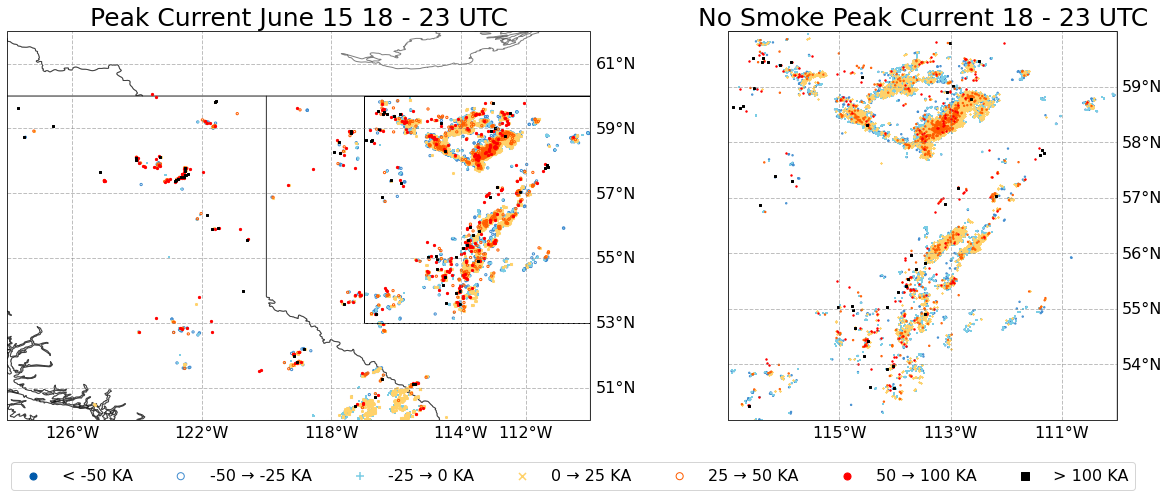

In [23]:
##### fig = plt.figure(figsize=(18,18))
fig = plt.figure(figsize=(22,18))

#entire region
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = june15.loc[(june15.hour >= 18) & (june15.hour <= 23)] # june15.lon >= -128) & (june15.lon <= -110) & (june15.lat >= 50) & (june15.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

# plt.legend(fontsize = 14)
nosmoke_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -122,  -118, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 15 18 - 23 UTC", fontsize = 25)

#nosmoke region  
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())

ax.set_extent([-117,-110,53,60])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

nosmoke_points = june15.loc[(june15.lon >= -117) & (june15.lon <= -110) & (june15.lat >= 53) & (june15.lat <= 60) & (june15.hour >= 18) & (june15.hour <= 23)]

nosmoke_darkblue = (nosmoke_points.loc[(nosmoke_points["peak-current"] <= -50)& (nosmoke_points.hour == 0)  ])
nosmoke_medblue = (nosmoke_points.loc[(nosmoke_points["peak-current"] > -50 ) & (nosmoke_points["peak-current"] <=-25 ) ])
nosmoke_lightblue = (nosmoke_points.loc[ (nosmoke_points["peak-current"] > -25 ) & (nosmoke_points["peak-current"] <=0 ) ])
nosmoke_lightorange = (nosmoke_points.loc[ (nosmoke_points["peak-current"] > 0 ) & (nosmoke_points["peak-current"] <=25 )])
nosmoke_darkorange = (nosmoke_points.loc[ (nosmoke_points["peak-current"] > 25 ) & (nosmoke_points["peak-current"] <=50 ) ])
nosmoke_red = (nosmoke_points.loc[(nosmoke_points["peak-current"] > 50 ) & (nosmoke_points["peak-current"] <=100 ) ])
nosmoke_black = (nosmoke_points.loc[(nosmoke_points["peak-current"] > 100 ) ])


plt.scatter(x = nosmoke_darkblue["lon"], y = nosmoke_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 2, alpha=1, label = '< -50 KA')
plt.scatter(x = nosmoke_medblue["lon"], y = nosmoke_medblue["lat"], facecolors='none', edgecolors='#418DD0', marker = "o", s = 2, alpha=1, label='-50 → -25 KA')
plt.scatter(x = nosmoke_lightblue["lon"], y = nosmoke_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 2, alpha=1, label='-25 → 0 KA')
plt.scatter(x = nosmoke_lightorange["lon"], y = nosmoke_lightorange["lat"], c = "#FFD26A", marker = "x", s = 2, alpha=1, label = "0 → 25 KA")
plt.scatter(x = nosmoke_darkorange["lon"], y = nosmoke_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 2, alpha=1, label ="25 → 50 KA" )
plt.scatter(x = nosmoke_red["lon"], y = nosmoke_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 2, alpha=1, label = "50 → 100 KA")
plt.scatter(x = nosmoke_black["lon"], y = nosmoke_black["lat"], c = "black", marker = "s", s = 2, alpha=1, label = "> 100 KA")

plt.legend(loc='lower center', 
           bbox_to_anchor=(-0.4, -0.2),
          ncol=7, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([ -115,  -113, -111])
gl.ylocator = mticker.FixedLocator([54,55, 56, 57,58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'


plt.subplots_adjust(left=0, right=1.0, top=0.3, bottom=0.0, wspace = -0.35)

tight_layout=True
plt.title("No Smoke Peak Current 18 - 23 UTC", fontsize =25)
plt.savefig("lightning_strength_nosmoke_subplots", bbox_inches = "tight", dpi = 400)
plt.show()




### june 15 one plot

/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:307: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/elenadworak/anaconda3/envs/mynewenv/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:331: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


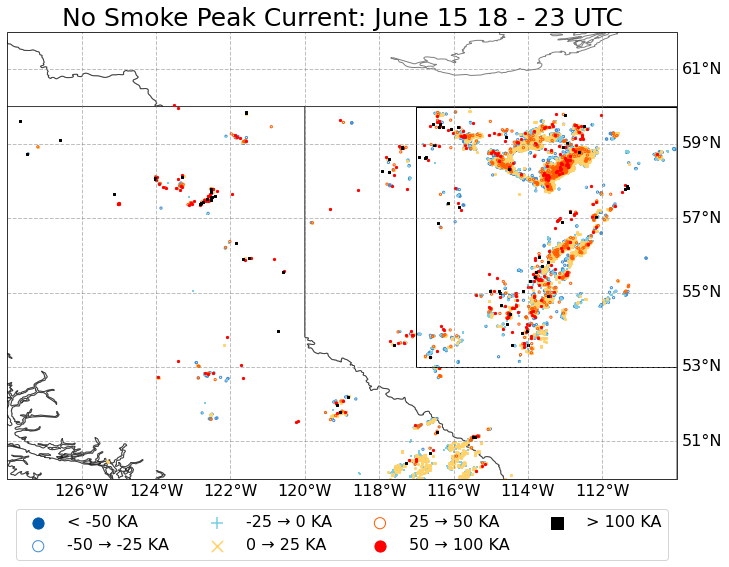

In [26]:
##### fig = plt.figure(figsize=(18,18))
fig = plt.figure(figsize=(12,12))

#entire region
ax = plt.subplot(1,1,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = june15.loc[(june15.hour >= 18) & (june15.hour <= 23)] # june15.lon >= -128) & (june15.lon <= -110) & (june15.lat >= 50) & (june15.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

# plt.legend(fontsize = 14)
nosmoke_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True

gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59,  61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 15 18 - 23 UTC", fontsize = 25)

#nosmoke region  

plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

# plt.subplots_adjust(left=0, right=1.0, top=0.3, bottom=0.0, wspace = -0.35)

tight_layout=True
plt.title("No Smoke Peak Current: June 15 18 - 23 UTC", fontsize =25)
plt.savefig("strength_nosmoke_map", bbox_inches = "tight", dpi = 400)
plt.show()



## no smoke moving boxes

In [24]:
# (june15["hour"] == 18) & (june15["lon"] >= -117)& (june15["lon"] <= -112) & (june15["lat"] >= 53) & (june15["lat"] <= 56) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
# (june15["hour"] == 19) & (june15["lon"] >= -116.5)& (june15["lon"] <= -111) & (june15["lat"] >= 54) & (june15["lat"] <= 57) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
# (june15["hour"] == 20) & (june15["lon"] >= -116)& (june15["lon"] <= -110) & (june15["lat"] >= 55) & (june15["lat"] <= 58) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
# (june15["hour"] == 21) & (june15["lon"] >= -115.5)& (june15["lon"] <= -110) & (june15["lat"] >= 56) & (june15["lat"] <= 59) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]
# (june15["hour"] == 22) & (june15["lon"] >= -115)& (june15["lon"] <= -110) & (june15["lat"] >= 57) & (june15["lat"] <= 60) & (june15["minute"] >= mins[j]) & (june15["minute"] <= mins[j] + 9) & (june15["peak-current"] != 0)]


def nosmoke_hourly_subregion_box(ax, subregion):
    geom18 = geometry.box(minx=-112,maxx=-117,miny=53,maxy=56)
    ax.add_geometries([geom18], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='red', linewidth = 1.5, linestyle = '-') # edgecolor='#005AAB',
    
    geom19 = geometry.box(minx=-111,maxx=-116.5,miny=54,maxy=57)
    ax.add_geometries([geom19], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor= "black", linewidth = 1, linestyle = '--') # '#418DD0'
    
    geom20 = geometry.box(minx=-110,maxx=-116,miny=55,maxy=58)
    ax.add_geometries([geom20], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor= "black", linewidth = 1, linestyle = '--') # "#7BCDE5"
    
    geom21 = geometry.box(minx=-110,maxx=-115.5,miny=56,maxy=59)
    ax.add_geometries([geom21], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor= "black", linewidth = 1, linestyle = '--') # "#FFD26A"
    
    geom22 = geometry.box(minx=-110,maxx=-115,miny=57,maxy=60)
    ax.add_geometries([geom22], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor= "black", linewidth = 1.5, linestyle = '-') # '#FF5D00'
    
    return ax

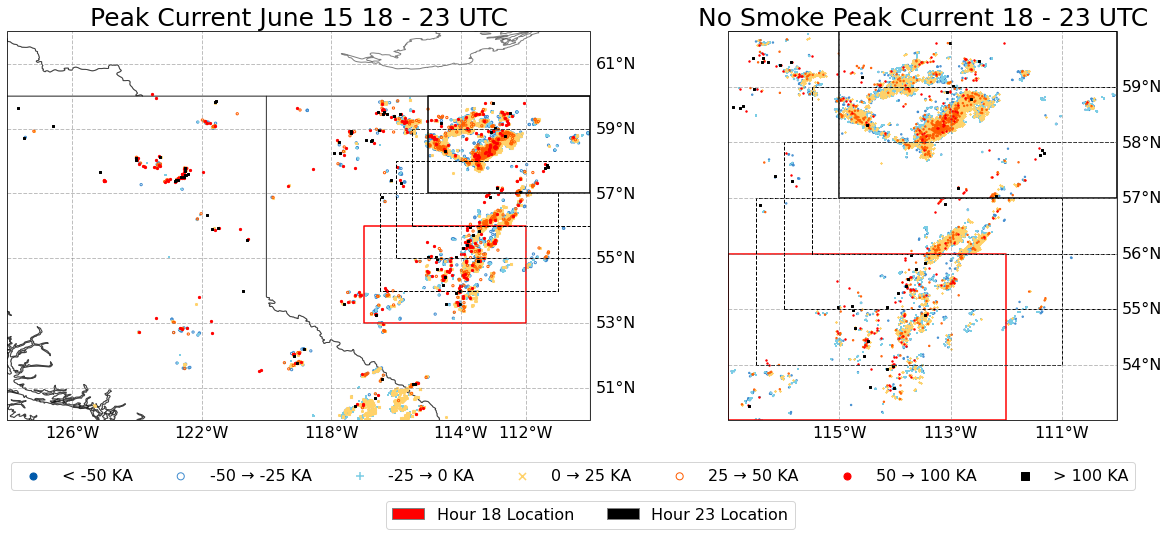

In [25]:
##### fig = plt.figure(figsize=(18,18))
fig = plt.figure(figsize=(22,18))

#entire region
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = june15.loc[(june15.hour >= 18) & (june15.hour <= 23)] # june15.lon >= -128) & (june15.lon <= -110) & (june15.lat >= 50) & (june15.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

# plt.legend(fontsize = 14)
nosmoke_hourly_subregion_box(ax, points_pos)

patch1 = mpatches.Patch(facecolor='red', edgecolor = "grey", label="Hour 18 Location")
patch2 = mpatches.Patch(facecolor='black', edgecolor = "grey", label="Hour 23 Location")

plt.legend(handles=[patch1, patch2], loc='lower center', 
    bbox_to_anchor=(1, -0.3),
    ncol=3, fancybox=True, shadow=False, fontsize = 16, markerscale=3.,)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -122,  -118, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 15 18 - 23 UTC", fontsize = 25)

#nosmoke region  
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())

ax.set_extent([-117,-110,53,60])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

nosmoke_points = june15.loc[(june15.lon >= -117) & (june15.lon <= -110) & (june15.lat >= 53) & (june15.lat <= 60) & (june15.hour >= 18) & (june15.hour <= 23)]

nosmoke_darkblue = (nosmoke_points.loc[(nosmoke_points["peak-current"] <= -50)& (nosmoke_points.hour == 0)  ])
nosmoke_medblue = (nosmoke_points.loc[(nosmoke_points["peak-current"] > -50 ) & (nosmoke_points["peak-current"] <=-25 ) ])
nosmoke_lightblue = (nosmoke_points.loc[ (nosmoke_points["peak-current"] > -25 ) & (nosmoke_points["peak-current"] <=0 ) ])
nosmoke_lightorange = (nosmoke_points.loc[ (nosmoke_points["peak-current"] > 0 ) & (nosmoke_points["peak-current"] <=25 )])
nosmoke_darkorange = (nosmoke_points.loc[ (nosmoke_points["peak-current"] > 25 ) & (nosmoke_points["peak-current"] <=50 ) ])
nosmoke_red = (nosmoke_points.loc[(nosmoke_points["peak-current"] > 50 ) & (nosmoke_points["peak-current"] <=100 ) ])
nosmoke_black = (nosmoke_points.loc[(nosmoke_points["peak-current"] > 100 ) ])


plt.scatter(x = nosmoke_darkblue["lon"], y = nosmoke_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 2, alpha=1, label = '< -50 KA')
plt.scatter(x = nosmoke_medblue["lon"], y = nosmoke_medblue["lat"], facecolors='none', edgecolors='#418DD0', marker = "o", s = 2, alpha=1, label='-50 → -25 KA')
plt.scatter(x = nosmoke_lightblue["lon"], y = nosmoke_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 2, alpha=1, label='-25 → 0 KA')
plt.scatter(x = nosmoke_lightorange["lon"], y = nosmoke_lightorange["lat"], c = "#FFD26A", marker = "x", s = 2, alpha=1, label = "0 → 25 KA")
plt.scatter(x = nosmoke_darkorange["lon"], y = nosmoke_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 2, alpha=1, label ="25 → 50 KA" )
plt.scatter(x = nosmoke_red["lon"], y = nosmoke_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 2, alpha=1, label = "50 → 100 KA")
plt.scatter(x = nosmoke_black["lon"], y = nosmoke_black["lat"], c = "black", marker = "s", s = 2, alpha=1, label = "> 100 KA")

nosmoke_hourly_subregion_box(ax, points_pos)

plt.legend(loc='lower center', 
           bbox_to_anchor=(-0.4, -0.2),
          ncol=7, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([ -115,  -113, -111])
gl.ylocator = mticker.FixedLocator([54,55, 56, 57,58, 59])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.subplots_adjust(left=0, right=1.0, top=0.3, bottom=0.0, wspace = -0.35)

tight_layout=True
plt.title("No Smoke Peak Current 18 - 23 UTC", fontsize =25)
plt.savefig("lightning_strength_nosmoke_subplots", bbox_inches = "tight", dpi = 400)
plt.show()


## smoke map

In [74]:
def smoke_subregion_box(ax, subregion):
    geom = geometry.box(minx=-120,maxx=-114,miny=58,maxy=60.5)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black',)
    return ax

In [ ]:
##### fig = plt.figure(figsize=(18,18))
fig = plt.figure(figsize=(18,18))

#entire region
ax = plt.subplot(1,2,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = june29.loc[(june29.hour >= 8) & (june29.hour <= 12)] # june29.lon >= -128) & (june29.lon <= -110) & (june29.lat >= 50) & (june29.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

# plt.legend(fontsize = 14)
smoke_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 29 8 - 12 UTC", fontsize = 25)

#smoke region  
ax = plt.subplot(1,2,2 ,projection=ccrs.PlateCarree())

ax.set_extent([-120.5,-113.5,57,61.5])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

smoke_points = june29.loc[(june29.lon >= -120) & (june29.lon <= -114) & (june29.lat >= 58) & (june29.lat <= 60.5) & (june29.hour >= 8) & (june29.hour <= 12)]

smoke_darkblue = (smoke_points.loc[(smoke_points["peak-current"] <= -50)& (smoke_points.hour == 0)  ])
smoke_medblue = (smoke_points.loc[(smoke_points["peak-current"] > -50 ) & (smoke_points["peak-current"] <=-25 ) ])
smoke_lightblue = (smoke_points.loc[ (smoke_points["peak-current"] > -25 ) & (smoke_points["peak-current"] <=0 ) ])
smoke_lightorange = (smoke_points.loc[ (smoke_points["peak-current"] > 0 ) & (smoke_points["peak-current"] <=25 )])
smoke_darkorange = (smoke_points.loc[ (smoke_points["peak-current"] > 25 ) & (smoke_points["peak-current"] <=50 ) ])
smoke_red = (smoke_points.loc[(smoke_points["peak-current"] > 50 ) & (smoke_points["peak-current"] <=100 ) ])
smoke_black = (smoke_points.loc[(smoke_points["peak-current"] > 100 ) ])


plt.scatter(x = smoke_darkblue["lon"], y = smoke_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 2, alpha=1, label = '< -50 KA')
plt.scatter(x = smoke_medblue["lon"], y = smoke_medblue["lat"], facecolors='none', edgecolors='#418DD0', marker = "o", s = 2, alpha=1, label='-50 → -25 KA')
plt.scatter(x = smoke_lightblue["lon"], y = smoke_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 2, alpha=1, label='-25 → 0 KA')
plt.scatter(x = smoke_lightorange["lon"], y = smoke_lightorange["lat"], c = "#FFD26A", marker = "x", s = 2, alpha=1, label = "0 → 25 KA")
plt.scatter(x = smoke_darkorange["lon"], y = smoke_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 2, alpha=1, label ="25 → 50 KA" )
plt.scatter(x = smoke_red["lon"], y = smoke_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 2, alpha=1, label = "50 → 100 KA")
plt.scatter(x = smoke_black["lon"], y = smoke_black["lat"], c = "black", marker = "s", s = 2, alpha=1, label = "> 100 KA")

plt.legend(loc='lower center', 
           bbox_to_anchor=(-0.1, -0.25),
          ncol=7, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-120, -118, -116, -114])
gl.ylocator = mticker.FixedLocator([58, 59, 60, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.0, wspace = 0.2)

tight_layout=True
plt.title("Smoke Peak Current 8 - 12 UTC", fontsize = 25)
plt.savefig("lightning_strength_smoke_subplots", bbox_inches = "tight", dpi = 400)
plt.show()




### one map smoke 

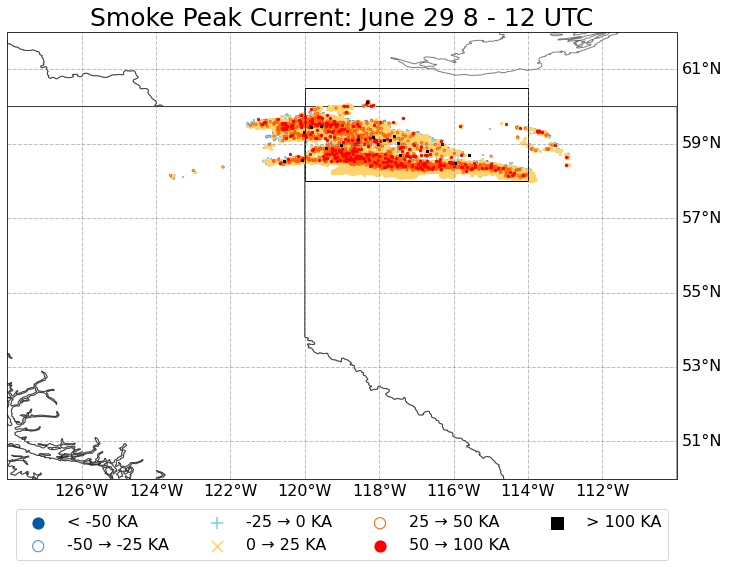

In [80]:
##### fig = plt.figure(figsize=(18,18))
fig = plt.figure(figsize=(12,12))

#entire region
ax = plt.subplot(1,1,1 ,projection=ccrs.PlateCarree())
ax.set_extent([-128,-110,50,62])

ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)

whole_points = june29.loc[(june29.hour >= 8) & (june29.hour <= 12)] # june29.lon >= -128) & (june29.lon <= -110) & (june29.lat >= 50) & (june29.lat <= 65) &
whole_darkblue = (whole_points.loc[(whole_points["peak-current"] <= -50) & (whole_points.hour == 0)])
whole_medblue = (whole_points.loc[ (whole_points["peak-current"] > -50 ) & (whole_points["peak-current"] <=-25 )])
whole_lightblue = (whole_points.loc[ (whole_points["peak-current"] > -25 ) & (whole_points["peak-current"] <=0 )])
whole_lightorange = (whole_points.loc[(whole_points["peak-current"] > 0 ) & (whole_points["peak-current"] <=25 )])
whole_darkorange = (whole_points.loc[ (whole_points["peak-current"] > 25 ) & (whole_points["peak-current"] <=50 ) ])
whole_red = (whole_points.loc[ (whole_points["peak-current"] > 50 ) & (whole_points["peak-current"] <=100 )])
whole_black = (whole_points.loc[(whole_points["peak-current"] > 100 ) ])


plt.scatter(x = whole_darkblue["lon"], y = whole_darkblue["lat"], facecolors='#005AAB', edgecolors='#005AAB', marker = "o", s = 5,  alpha=1, label = '< -50 KA')
plt.scatter(x = whole_medblue["lon"], y = whole_medblue["lat"], facecolors='none', s = 5, edgecolors='#418DD0', marker = "o",  alpha=1, label='-50 → -25 KA')
plt.scatter(x = whole_lightblue["lon"], y = whole_lightblue["lat"], c = "#7BCDE5", marker = "+", s = 5,  alpha=1, label='-25 → 0 KA')
plt.scatter(x = whole_lightorange["lon"], y = whole_lightorange["lat"], c = "#FFD26A", marker = "x", s = 5,  alpha=1, label = "0 → 25 KA")
plt.scatter(x = whole_darkorange["lon"], y = whole_darkorange["lat"], facecolors = "none", edgecolors = '#FF5D00', marker = "o", s = 5,  alpha=1, label ="25 → 50 KA" )
plt.scatter(x = whole_red["lon"], y = whole_red["lat"], facecolors = "r", edgecolors = 'r', marker = "o", s = 5,  alpha=1, label = "50 → 100 KA")
plt.scatter(x = whole_black["lon"], y = whole_black["lat"], c = "black", marker = "s", s = 5,  alpha=1, label = "> 100 KA")

# plt.legend(fontsize = 14)
smoke_subregion_box(ax, points_pos)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([-126, -124, -122, -120, -118, -116, -114, -112])
gl.ylocator = mticker.FixedLocator([ 51,  53,  55,  57,  59, 61])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Peak Current June 29 8 - 12 UTC", fontsize = 25)


plt.legend(loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=4, fancybox=True, shadow=False, fontsize = 16, markerscale=5.)

# plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.0, wspace = 0.2)

tight_layout=True
plt.title("Smoke Peak Current: June 29 8 - 12 UTC", fontsize = 25)
plt.savefig("strength_smoke", bbox_inches = "tight", dpi = 400)
plt.show()




## finding lightning of other pyrocbs

In [ ]:
def mckay_subregion_box(ax, subregion):
    geom = geometry.box(minx=-122.5,maxx=-122,miny=51,maxy=53)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black')
    return ax

len(alldays_concat.loc[(alldays_concat.lon >= -122.5) & (alldays_concat.lon <= -122) & (alldays_concat.lat >= 51) & (alldays_concat.lat <= 53)])

In [ ]:
def lytton_subregion_box(ax, subregion):
    geom = geometry.box(minx=-122,maxx=-121,miny=50.3,maxy=51)
    ax.add_geometries([geom], ccrs.PlateCarree(), alpha=1, facecolor = "none", edgecolor='black')
    return ax
len(alldays_concat.loc[(alldays_concat.lon > -122) & (alldays_concat.lon < -121) & (alldays_concat.lat > 50.3) & (alldays_concat.lat < 50.8)])

In [ ]:
fig = plt.figure(figsize=(10,10))

ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cartopy.feature.BORDERS, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.COASTLINE, linestyle = '-', alpha = 0.5)
ax.add_feature(cartopy.feature.STATES, linestyle = '-', alpha = 0.5, edgecolor="black")


# Make figure larger
plt.xlim([-123, -119.5])
plt.ylim([50, 54])


#july1 = (july1.loc[(july1.lon > -124) & (july1.lon < -119) & (july1.lat > 50) & (july1.lat < 55)])
pyrocb_subregion_box(ax, july1)
mckay_subregion_box(ax, july1)
lytton_subregion_box(ax, july1)

plt.scatter(x = july1["lon"], y = july1["lat"], c = np.log(abs(july1["peak-current"])) , cmap="Oranges", s = 5, edgecolors="none", marker = 'o', alpha=1)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='grey', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlines = True
gl.xlocator = mticker.FixedLocator([ -123, -122, -121, -120])
gl.ylocator = mticker.FixedLocator([51, 52,  53, 54])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 16, 'color': 'black'}
gl.ylabel_style = {'size': 16, 'color': 'black'} #, 'weight': 'bold'

plt.title("Everything map")
# plt.savefig("pos_neg_map", dpi = 200)

plt.show()

# time series

## pyrocb long time series: 06/30 6 UTC - 07/01 12 UTC

In [ ]:
from textwrap import wrap

fig,ax = plt.subplots(figsize=(20,8))

xValues = np.arange(0, 181, 1)
xticks = np.arange(0, 181, 36)
yticks = np.arange(0, 1050, 100)


# [252:505]
ax.plot(xValues, d["num_strikes_pyrocb"][324:505], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, d["num_pos_current_pyrocb"][324:505], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, d["num_neg_current_pyrocb"][324:505], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,1050))
ax.set_ylabel("Lightning Strike Count", fontsize = 20)
ax.legend(loc = "upper left", fontsize = 18)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 06 UTC", "06/30 12 UTC", "06/30 18 UTC",  
           "07/01 00 UTC", "07/01 06 UTC", "07/01 12 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 105, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb"][324:505], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=20)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,105))
ax2.spines['right'].set_color('red')


plt.grid()
plt.tight_layout()
plt.title("Pyrocb Lightning Strike Count and Polarity [-121.5 W : -119 W, 51 N : 53 N]", y=1.01, fontsize = 22) 
plt.savefig("pyrocb_timeseries_full.png", bbox_inches = "tight", dpi = 500)

## pyrocb short  time series  june 30 hour 21 to july 1 hour 5

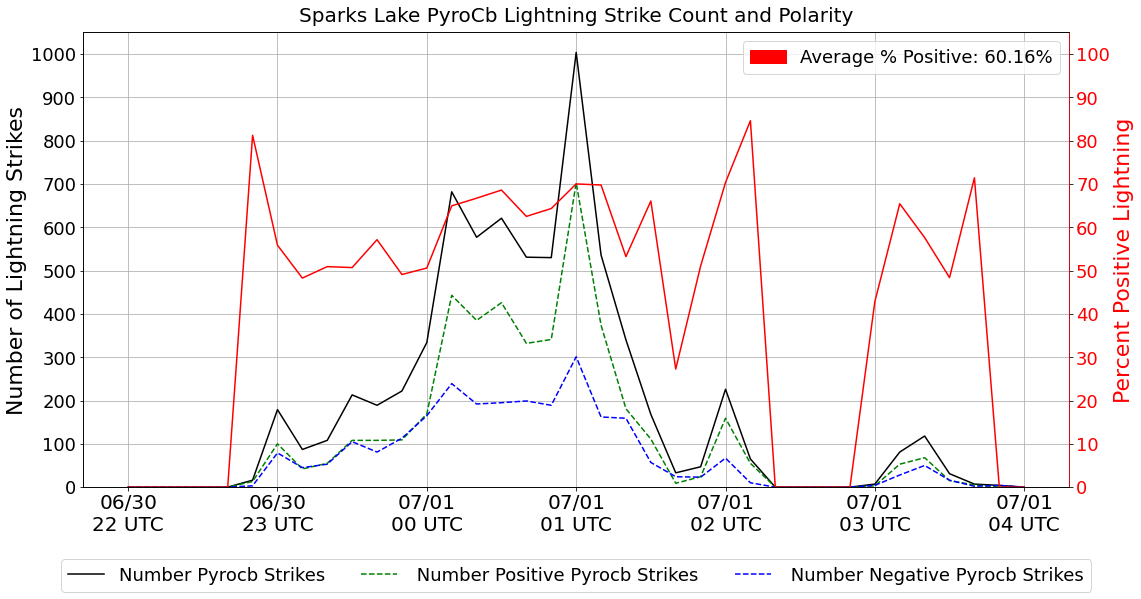

In [55]:
# june 30 hour 21 to july 1 hour 5
#plt.figure(figsize=(16,8))
fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 37, 1)
xticks = np.arange(0, 37, 6)
yticks = np.arange(0, 1050, 100)
# plt.plot(time (x axis), number of lightning strikes (y axis) , color and line style, label = "label")

ax.plot(xValues, d["num_strikes_pyrocb"][420:457], "k-", label = "Number Pyrocb Strikes")
ax.plot(xValues, d["num_pos_current_pyrocb"][420:457], "g--", label = " Number Positive Pyrocb Strikes")
ax.plot(xValues, d["num_neg_current_pyrocb"][420:457], "b--", label = " Number Negative Pyrocb Strikes")

ax.set_ylim((0,1050))
#ax.set_xlabel("Date and Time", fontsize = 18)
ax.set_ylabel("Number of Lightning Strikes", fontsize = 22)
# ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/30 22 UTC", "06/30 23 UTC", "07/01 00 UTC", 
          "07/01 01 UTC", "07/01 02 UTC", "07/01 03 UTC", "07/01 04 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 18)
plt.grid()

yticks2 = np.arange(0, 105, 10)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_pyrocb"][420:457], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 18,  color="red")
ax2.set_ylim((0,105))
ax2.spines['right'].set_color('red')

red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_pyrocb"][425:446])))
plt.legend(handles=[red_patch], fontsize = 18)




#plt.grid()
plt.tight_layout()
plt.title("Sparks Lake PyroCb Lightning Strike Count and Polarity", y=1.01, fontsize = 20) 

plt.savefig("pyrocb_timeseries_short.png", bbox_inches = "tight", dpi = 500)


## smoke time series
- 8 UTC to 13 UTC [192: 228]

In [ ]:
#np.sum(d["num_strikes_smoke"])
len(smoke_array_flat)
d["num_strikes_smoke"][192:217]

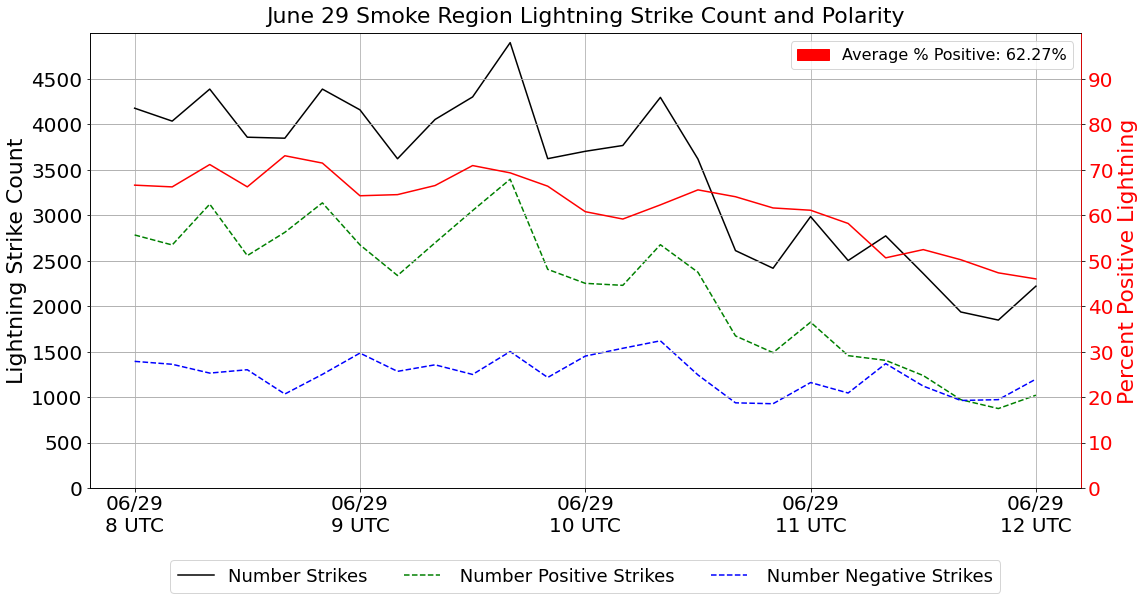

In [54]:
fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 25, 1)
xticks = np.arange(0, 25, 6)
yticks = np.arange(0, 5000, 500)

ax.plot(xValues, d["num_strikes_smoke"][192:217], "k-", label = "Number Strikes")
ax.plot(xValues, d["num_pos_current_smoke"][192:217], "g--", label = " Number Positive Strikes")
ax.plot(xValues, d["num_neg_current_smoke"][192:217], "b--", label = " Number Negative Strikes")

ax.set_ylim((0,5000))
ax.set_ylabel("Lightning Strike Count", fontsize = 22)
#ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/29 8 UTC", "06/29 9 UTC", "06/29 10 UTC", "06/29 11 UTC", "06/29 12 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()

yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d["percent_pos_current_smoke"][192:217], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')


red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d["percent_pos_current_smoke"][192:217])))
plt.legend(handles=[red_patch], fontsize = 16)

plt.grid()
plt.tight_layout()
plt.title("June 29 Smoke Region Lightning Strike Count and Polarity", y=1.01, fontsize = 22) 
plt.savefig("smoke_timeseries_june29.png", bbox_inches = "tight", dpi = 500)

## no smoke time series

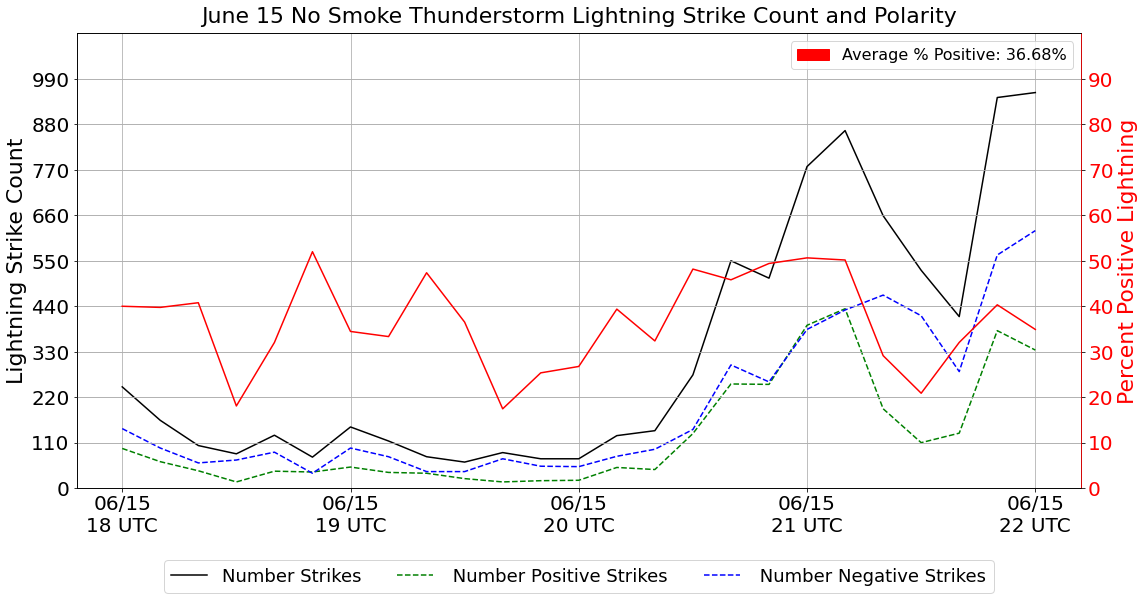

In [53]:
# hour18, hour19, hour20, hour21, hour22

fig,ax = plt.subplots(figsize=(16,8))

xValues = np.arange(0, 25, 1)
xticks = np.arange(0, 25, 6)
yticks = np.arange(0, 1100, 110)

# "num_strikes_control", "percent_pos_current_control", "num_pos_current_control", "num_neg_current_control", 

ax.plot(xValues, d15["num_strikes_control"][:-5], "k-", label = "Number Strikes")
ax.plot(xValues, d15["num_pos_current_control"][:-5], "g--", label = " Number Positive Strikes")
ax.plot(xValues, d15["num_neg_current_control"][:-5], "b--", label = " Number Negative Strikes")

ax.set_ylim((0,1100))
ax.set_ylabel("Lightning Strike Count", fontsize = 22)
#ax.legend(loc = "upper left", fontsize = 18)
plt.legend( loc='lower center', 
    bbox_to_anchor=(0.5, -0.25),
    ncol=3, fancybox=True, shadow=False, fontsize = 18, markerscale=3.,)
ax.set_xticks(xticks)
ax.set_yticks(yticks)
labels = ["06/15 18 UTC", "06/15 19 UTC", "06/15 20 UTC", "06/15 21 UTC", "06/15 22 UTC"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 20)
ax.set_yticklabels(yticks, fontsize = 20)
plt.grid()


# twin object for two different y-axis on the sample plot
yticks2 = np.arange(0, 100, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(xValues, d15["percent_pos_current_control"][:-5], color="red")
ax2.set_ylabel("Percent Positive Lightning", color="red",fontsize=22)
ax2.set_yticks(yticks2)
ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
ax2.set_ylim((0,100))
ax2.spines['right'].set_color('red')


red_patch = mpatches.Patch(color='red', label='Average % Positive: {:.2f}%'.format(np.mean(d15["percent_pos_current_control"][:-5])))
plt.legend(handles=[red_patch], fontsize = 16)


plt.grid()
plt.tight_layout()
plt.title("June 15 No Smoke Thunderstorm Lightning Strike Count and Polarity", y=1.01, fontsize = 22) 
plt.savefig("nosmoke_timeseries_june15.png", bbox_inches = "tight", dpi = 500)

# boxplots brightness temperature

## pyrocb boxplot june 30 22 UTC - July 1 2 UTC

In [ ]:

fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Pyrocb Peak Current 06/29 22:50 UTC - 07/01 02:20', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["22:50 06/30", 
          "23:00", "23:10", "23:20", "23:30", "23:40", "23:50",
          "00:00 07/01","00:10", "00:20","00:30", "00:40", "00:50",
          "01:00","01:10", "01:20","01:30", "01:40", "01:50", 
          "02:10","02:20"]

labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 12)

plt.yticks(fontsize = 16)
plt.ylim(-90, 70)

plt.axhline(y=0,  linestyle='-')

ax.boxplot(pyrocb_array, showfliers=False)
plt.savefig("boxplot_pyrocb.png",bbox_inches = "tight", dpi = 800)
plt.show()


## annotated pyrocb boxplot 

In [ ]:

fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Pyrocb Peak Current 06/29 22:50 UTC - 07/01 02:20', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["22:50 06/30", 
          "23:00", "23:10", "23:20", "23:30", "23:40", "23:50",
          "00:00 07/01","00:10", "00:20","00:30", "00:40", "00:50",
          "01:00","01:10", "01:20","01:30", "01:40", "01:50", 
          "02:10","02:20"]

labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 12)

plt.yticks(fontsize = 16)
plt.ylim(-30, 50 )

plt.axhline(y=0,  linestyle='-')

for i in range(0, 21): 
    plt.annotate("{0:.2f}".format(np.median(pyrocb_array[i])), xy =(i+0.7, 30), fontsize = 12, color = "red")
    plt.annotate("{0:.2f}".format(np.mean(pyrocb_array[i])), xy =(i+0.7, 25), fontsize = 12, color = "blue")

red_patch = mpatches.Patch(color='red', label='Median')
blue_patch = mpatches.Patch(color='blue', label='Mean')
plt.legend(handles=[red_patch, blue_patch], fontsize = 14)

ax.boxplot(pyrocb_array, showfliers=False)
plt.savefig("boxplot_pyrocb_annotated.png",bbox_inches = "tight", dpi = 800)
plt.show()



## pyrocb star for mean and lightning count

In [ ]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Pyrocb Peak Current 06/29 23:00 UTC - 07/01 01:30', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["23:00 06/30", "23:10", "23:20", "23:30", "23:40", "23:50",
          "00:00 07/01","00:10", "00:20","00:30", "00:40", "00:50",
          "01:00","01:10", "01:20","01:30", "01:40", "01:50", 
          "02:00", "02:10"]

labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 12)

plt.yticks(fontsize = 16)
plt.ylim(-30, 40 )

plt.axhline(y=0,  linestyle='-')


for i in range(5, 21):  
    plt.annotate("{0:.0f}".format(len(pyrocb_array[i])), xy =(i-4.3, 25), fontsize = 12, color = "green")

green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 14)

ax.boxplot(pyrocb_array[5:], showfliers=False, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.savefig("boxplot_pyrocb_annotated.png",bbox_inches = "tight", dpi = 800)
plt.show()


## annotated pyrocb lightning count, using dictionary

In [ ]:
# fig, ax = plt.subplots(figsize = (16,6))

# ax.set_title('Pyrocb Peak Current 06/29 22:50 UTC - 07/01 02:20', fontsize = 20)
# ax.set_ylabel("Peak Current (kA)", fontsize = 18)
# ax.set_xlabel("Hour (UTC)", fontsize = 18)

# labels = ["22:50 06/30", 
#           "23:00", "23:10", "23:20", "23:30", "23:40", "23:50",
#           "00:00 07/01","00:10", "00:20","00:30", "00:40", "00:50",
#           "01:00","01:10", "01:20","01:30", "01:40", "01:50", 
#           "02:10","02:20"]

# labels = ['\n'.join(wrap(l, 6)) for l in labels]
# ax.set_xticklabels(labels, fontsize = 12)

# plt.yticks(fontsize = 16)
# plt.ylim(-30, 40 )

# plt.axhline(y=0,  linestyle='-')

# for i in range(410, 431): 
#     plt.annotate("{0:.0f}".format(len(d["all_strikes_pyrocb"][i])), xy =(i - 409.3 , 25), fontsize = 12, color = "green")

# green_patch = mpatches.Patch(color='green', label='Lightning Count')
# plt.legend(handles=[green_patch], fontsize = 14)

# ax.boxplot(d["all_strikes_pyrocb"][410:431], showfliers=False, showmeans = True, meanprops={"marker":"o",
#                        "markerfacecolor":"white", 
#                        "markeredgecolor":"black",
#                       "markersize":"10"})
# plt.savefig("boxplot_pyrocb_annotated.png",bbox_inches = "tight", dpi = 800)
# plt.show()


## magnitude pyrocb

In [ ]:

fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Pyrocb Absolute Peak Current 06/29 22:50 UTC - 07/01 02:20', fontsize = 20)
ax.set_ylabel("Absolute Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["22:50 06/30", 
          "23:00", "23:10", "23:20", "23:30", "23:40", "23:50",
          "00:00 07/01","00:10", "00:20","00:30", "00:40", "00:50",
          "01:00","01:10", "01:20","01:30", "01:40", "01:50", 
          "02:10","02:20"]

labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 12)

plt.yticks(fontsize = 16)
plt.ylim(0, 25)

for i in range(0, 21): 
    plt.annotate("{0:.0f}".format(len(pyrocb_mag_array[i])), xy =(i+0.7, 20), fontsize = 12, color = "green")

green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 14)


ax.boxplot(pyrocb_mag_array, showfliers=False, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})
plt.savefig("boxplot_pyrocb_absolute_annotated.png",bbox_inches = "tight", dpi = 800)
plt.show()



## smoke region box plot

In [ ]:


fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('June 29 Hours 8 - 12 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["8:00", "9:00", "10:00", "11:00","12:00"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)
plt.ylim(-90, 70)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')
ax.boxplot(smoke_array, showfliers=False)

plt.savefig("boxplot_11um_june29.png", dpi = 800)
plt.show()

## annotated smoke box plot

In [ ]:

fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('June 29 Hours 8 - 12 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)


labels = ["8:00",  "", "", "8:30", "", "",
          "9:00",  "", "", "9:30", "", "",
          "10:00",  "", "", "10:30", "", "",
          "11:00", "", "", "11:30", "", "",
          "12:00"]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)
plt.ylim(-90, 90)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')

for i in range(0, 25): 
    plt.annotate("{:,}".format(len(smoke_array[i])), xy =(i+0.6, 40), fontsize = 12, color = "green")

green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 14)


ax.boxplot(smoke_array[:-5], showfliers=False, showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

plt.savefig("boxplot_11um_june29_annotated.png", dpi = 800)
plt.show()



## annotated smoke lightning count, using dictionary

In [ ]:
# fig, ax = plt.subplots(figsize = (18,6))

# ax.set_title('June 29 Hours 8 - 12 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)
# ax.set_ylabel("Peak Current (kA)", fontsize = 18)
# ax.set_xlabel("Hour (UTC)", fontsize = 18)


# labels = ["8:00",  "", "", "8:30", "", "",
#           "9:00",  "", "", "9:30", "", "",
#           "10:00",  "", "", "10:30", "", "",
#           "11:00", "", "", "11:30", "", "",
#           "12:00"]
# labels = ['\n'.join(wrap(l, 6)) for l in labels]
# ax.set_xticklabels(labels, fontsize = 16)
# plt.ylim(-60, 60)

# plt.yticks(fontsize = 16)
# plt.axhline(y=0,  linestyle='-')

# for i in range(0, 25): 
#     plt.annotate("{:,}".format(len(d["all_strikes_smoke"][i])), xy =(i - 0.4, 40), fontsize = 12, color = "green")

# green_patch = mpatches.Patch(color='green', label='Lightning Count')
# plt.legend(handles=[green_patch], fontsize = 14)


# ax.boxplot(d["all_strikes_smoke"][:24], showfliers=False, showmeans = True, meanprops={"marker":"o",
#                        "markerfacecolor":"white", 
#                        "markeredgecolor":"black",
#                       "markersize":"10"})

# plt.savefig("boxplot_11um_june29_annotated.png", dpi = 800)
# plt.show()



## no smoke boxplot

In [ ]:

fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('June 15 No Smoke Hours 18 - 23 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)

ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["18:00", "", "", "18:30", "", "",
          "19:00", "", "", "19:30", "", "",
          "20:00", "", "", "20:30", "", "",
          "21:00","", "", "21:30", "", "",
          "22:00" ]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)

plt.ylim(-90, 90)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')
ax.boxplot(nosmoke_array[:-5], showfliers=False)

plt.savefig("boxplot_11um_june15.png", dpi = 800)
plt.show()

## annotated no smoke boxplot 

In [ ]:

fig, ax = plt.subplots(figsize = (20,6))

ax.set_title('June 15 No Smoke Hours 18 - 23 UTC Thunderstorm 11 um BT Peak Current', fontsize = 20)

ax.set_ylabel("Peak Current (kA)", fontsize = 18)
ax.set_xlabel("Hour (UTC)", fontsize = 18)

labels = ["18:00", "", "", "18:30", "", "",
          "19:00", "", "", "19:30", "", "",
          "20:00", "", "", "20:30", "", "",
          "21:00","", "", "21:30", "", "",
          "22:00" ]
labels = ['\n'.join(wrap(l, 6)) for l in labels]
ax.set_xticklabels(labels, fontsize = 16)

plt.ylim(-100, 120)

plt.yticks(fontsize = 16)
plt.axhline(y=0,  linestyle='-')
ax.boxplot(nosmoke_array[:-5], showfliers=False, showmeans = True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"})

for i in range(0, 30): 
    plt.annotate("{}".format(len(nosmoke_array[i])), xy =(i+0.8, 80), fontsize = 13, color = "green")

green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 14)


plt.savefig("boxplot_11um_june15_annotated.png", dpi = 800)
plt.show()



# combined one bar for each 
- this shows all strikes for the whole time period, not refined 

/tmp/ipykernel_307463/712441952.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 16)


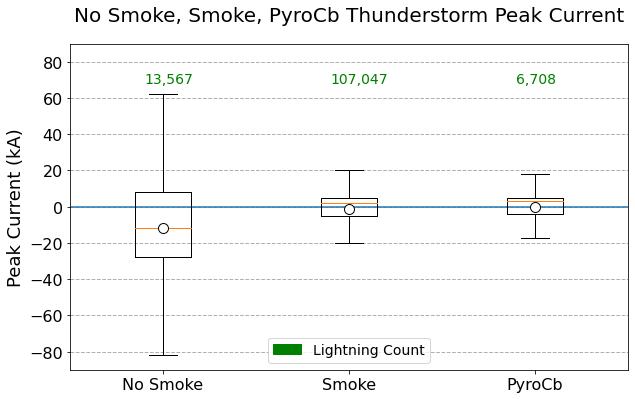

In [78]:
fig, ax = plt.subplots(figsize = (10,6))

ax.set_title('No Smoke, Smoke, PyroCb Thunderstorm Peak Current', fontsize = 20, y = 1.05)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)

labels = ["No Smoke", "Smoke", "PyroCb"] #"No Smoke", 

ax.set_xticklabels(labels, fontsize = 16)

plt.yticks(fontsize = 16)
plt.ylim(-90, 90)

plt.axhline(y=0,  linestyle='-')

plt.annotate("{:,}".format(len(nosmoke_array_flat)), xy =(0.9, 68), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(smoke_array_flat)), xy =(1.9, 68), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(pyrocb_array_flat)), xy =(2.9, 68), fontsize = 14, color = "green")


green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 16, loc = "lower center")


data = [nosmoke_array_flat, smoke_array_flat,pyrocb_array_flat] #d15["all_strikes_control"],
ax.boxplot(data, showfliers=False, showmeans = True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"})
plt.grid(linestyle='--', linewidth=1, axis='y')

plt.savefig("boxplot_allcases.png",bbox_inches = "tight", dpi = 800)
plt.show()


## positive combined

/tmp/ipykernel_307463/439715896.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, fontsize = 12)


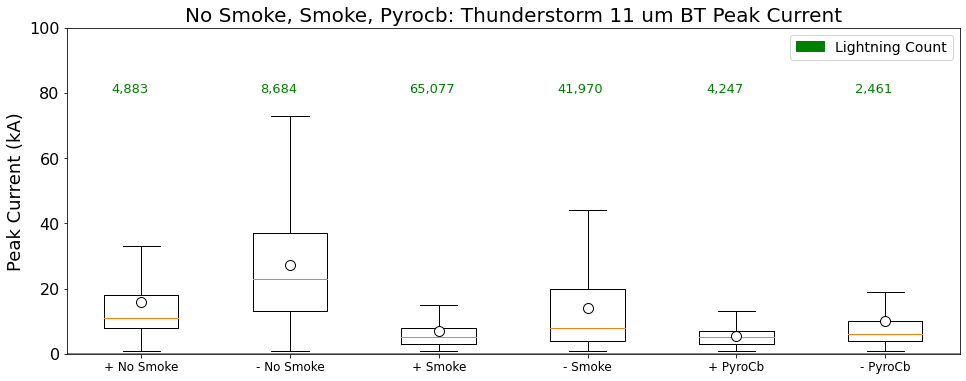

In [66]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('No Smoke, Smoke, Pyrocb: Thunderstorm 11 um BT Peak Current', fontsize = 20)
ax.set_ylabel("Peak Current (kA)", fontsize = 18)

labels = ["+ No Smoke", "- No Smoke", "+ Smoke", "- Smoke", "+ PyroCb", "- PyroCb"]  

ax.set_xticklabels(labels, fontsize = 12)

plt.yticks(fontsize = 16)
plt.ylim(0, 100)

plt.axhline(y=0,  linestyle='-')

plt.annotate("{:,}".format(len(nosmoke_pos_array_flat)), xy =(0.8, 80), fontsize = 13, color = "green")
plt.annotate("{:,}".format(len(nosmoke_neg_array_flat)), xy =(1.8, 80), fontsize = 13, color = "green")

plt.annotate("{:,}".format(len(smoke_pos_array_flat)), xy =(2.8, 80), fontsize = 13, color = "green")
plt.annotate("{:,}".format(len(smoke_neg_array_flat)), xy =(3.8, 80), fontsize = 13, color = "green")

plt.annotate("{:,}".format(len(pyrocb_pos_array_flat)), xy =(4.8, 80), fontsize = 13, color = "green")
plt.annotate("{:,}".format(len(pyrocb_neg_array_flat)), xy =(5.8, 80), fontsize = 13, color = "green")


green_patch = mpatches.Patch(color='green', label='Lightning Count')
plt.legend(handles=[green_patch], fontsize = 14)

data = [nosmoke_pos_array_flat, list(map(abs, nosmoke_neg_array_flat)), smoke_pos_array_flat, list(map(abs, smoke_neg_array_flat)), pyrocb_pos_array_flat, list(map(abs, pyrocb_neg_array_flat))] #d15["all_strikes_control"],

ax.boxplot(data, showfliers=False, showmeans = True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"})

plt.savefig("boxplot_posneg_allcases.png",bbox_inches = "tight", dpi = 800)
plt.show()


## red blue positive negative 

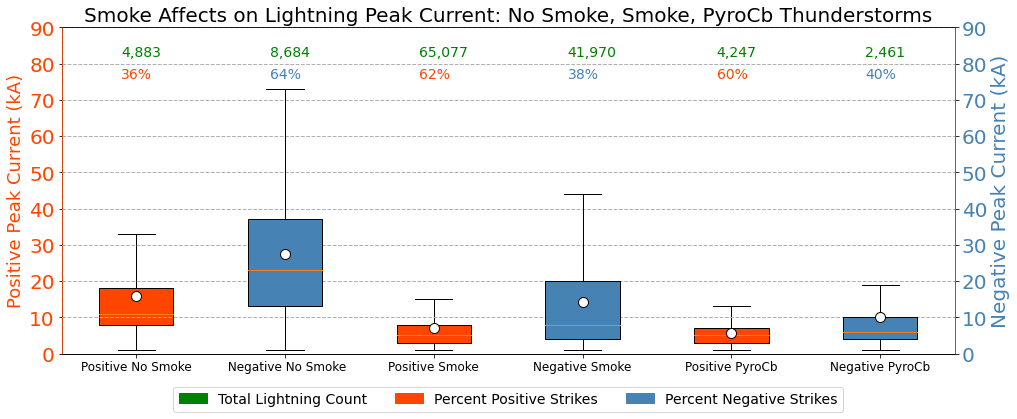

In [31]:
fig, ax = plt.subplots(figsize = (16,6))

ax.set_title('Smoke Affects on Lightning Peak Current: No Smoke, Smoke, PyroCb Thunderstorms', fontsize = 20)
ax.set_ylabel("Positive Peak Current (kA)", color = "orangered", fontsize = 18)
plt.yticks(fontsize = 20)
plt.ylim(0, 90)
plt.yticks(fontsize = 20, color = "orangered")

data = [nosmoke_pos_array_flat, smoke_pos_array_flat, pyrocb_pos_array_flat] 
box1 = ax.boxplot(data, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, positions = [0, 2, 4])

yticks2 = np.arange(0, 90, 10)
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
data2 = [list(map(abs, nosmoke_neg_array_flat)), list(map(abs, smoke_neg_array_flat)), list(map(abs, pyrocb_neg_array_flat))] 
box2 = ax2.boxplot(data2, showfliers=False, showmeans = True, patch_artist=True, meanprops={"marker":"o",
                   "markerfacecolor":"white", 
                   "markeredgecolor":"black",
                  "markersize":"10"}, positions = [1, 3, 5])
ax2.set_ylabel("Negative Peak Current (kA)", color="steelblue",fontsize=20)
# ax2.set_yticks(yticks2)
# ax2.set_yticklabels(yticks2, fontsize = 20,  color="red")
# ax2.set_ylim((0,100))
plt.yticks(fontsize = 20, color = "steelblue")
plt.ylim(0, 90)
ax2.spines['right'].set_color('steelblue')
ax2.spines['left'].set_color('orangered')

color1 = ['orangered', 'orangered', 'orangered'] 
for patch, color in zip(box1['boxes'], color1):
    patch.set_facecolor(color)

color2 = ['steelblue', 'steelblue', 'steelblue']
for patch, color in zip(box2['boxes'], color2):
    patch.set_facecolor(color)
        
labels = ["Positive No Smoke",  "Positive Smoke", "Positive PyroCb", " Negative No Smoke", "Negative Smoke",  "Negative PyroCb"]  
ax.set_xticklabels(labels, fontsize = 12)

plt.annotate("{:,}".format(len(nosmoke_pos_array_flat)), xy =(-0.1, 82), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(nosmoke_neg_array_flat)), xy =(0.9, 82), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(smoke_pos_array_flat)), xy =(1.9, 82), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(smoke_neg_array_flat)), xy =(2.9, 82), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(pyrocb_pos_array_flat)), xy =(3.9, 82), fontsize = 14, color = "green")
plt.annotate("{:,}".format(len(pyrocb_neg_array_flat)), xy =(4.9, 82), fontsize = 14, color = "green")

plt.annotate("{:.0f}%".format(np.mean(d15["percent_pos_current_control"])), xy =(-0.1, 76), fontsize = 14, color = "orangered")
plt.annotate("{:.0f}%".format(100 - np.mean(d15["percent_pos_current_control"])), xy =(0.9, 76), fontsize = 14, color = "steelblue")
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_smoke"][192:217])), xy =(1.9, 76), fontsize = 14, color = "orangered")
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_smoke"][192:217])), xy =(2.9, 76), fontsize = 14, color = "steelblue")
plt.annotate("{:.0f}%".format(np.mean(d["percent_pos_current_pyrocb"][425:446])), xy =(3.9, 76), fontsize = 14, color = "orangered")
plt.annotate("{:.0f}%".format(100 - np.mean(d["percent_pos_current_pyrocb"][425:446])), xy =(4.9, 76), fontsize = 14, color = "steelblue")

green_patch = mpatches.Patch(color='green', label='Total Lightning Count')
red_patch = mpatches.Patch(color='orangered', label='Percent Positive Strikes')
blue_patch = mpatches.Patch(color='steelblue', label='Percent Negative Strikes')

plt.legend(handles=[green_patch, red_patch, blue_patch], fontsize = 14,loc='lower center', 
           bbox_to_anchor=(0.5, -0.2),
          ncol=3, fancybox=True, shadow=False)
#ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.grid(linestyle='--', linewidth=1)
plt.savefig("boxplot_posneg_allcases.png",bbox_inches = "tight", dpi = 800)
plt.show()


# positive and negative

## pyrocb positive negative

In [ ]:
plt.figure(figsize=(16, 8))

hours = ([23, 0, 1, 2])

sns.boxplot(x= "hour", y= abs(june30_july1_concat["peak-current"]), hue='polarity', data= june30_july1_concat, 
            order = [23, 0, 1, 2, 3], showfliers = False, 
            showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

plt.ylabel("Peak current", size=14)
plt.xlabel("Hour",size=14)
plt.title("Pyrocb positive and negative", size=18)


## smoke positive negative

In [ ]:
plt.figure(figsize=(16, 8))

hours = ([23, 0, 1, 2])

sns.boxplot(x= "hour", y= abs(june15["peak-current"]), hue='polarity', data= june15, 
            order = [23, 0, 1, 2, 3], showfliers = False, 
            showmeans = True, meanprops={"marker":"o",
                       "markerfacecolor":"white", 
                       "markeredgecolor":"black",
                      "markersize":"10"})

plt.ylabel("Peak current", size=14)
plt.xlabel("Hour",size=14)
plt.title("June 15 positive and negative", size=18)
